# IS 707 Project - Email Spam Detection by NLP Techniques


# Loading the dataset

In [100]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/IS 707 Project Dataset/spam.csv', encoding='ISO-8859-1')

# Data Exploration

In [101]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
df.shape

(5572, 5)

In [103]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [105]:
# Datatypes of each column 
print("\nData Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object


In [106]:
# Summary of categorial columns
print("\nValue Counts of Target Column (e.g., Spam or Not Spam):")
if 'target_column' in df.columns:  # replace with actual column name if needed
    print(df['target_column'].value_counts())


Value Counts of Target Column (e.g., Spam or Not Spam):


In [107]:
# Null values
df.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [108]:
# Duplicate values
df[df.duplicated()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
222,ham,"Sorry, I'll call later",NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN


# Data cleaning

In [109]:
# Display column names in the DataFrame
print("Column names:", df.columns)


Column names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/IS 707 Project Dataset/spam.csv', encoding='ISO-8859-1')

# Rename columns for better readability
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Drop unnecessary columns
df = df[['label', 'text']]

# Check for and handle missing values
print("Missing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)

# Check for and drop duplicate rows
print("Duplicate Rows:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Verify cleaned data
print("Data Types:")
print(df.dtypes)
print("Data Sample:")
print(df.head())

# Save the cleaned data
df.to_csv('cleaned_file.csv', index=False)


Missing Values:
label    0
text     0
dtype: int64
Duplicate Rows:
403
Data Types:
label    object
text     object
dtype: object
Data Sample:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Exploration of dataset after cleaning

In [111]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df.shape

(5169, 2)

In [113]:
df.describe()

,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [115]:
print("\nData Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
label    object
text     object
dtype: object


In [116]:
df.isnull().any()

label    False
text     False
dtype: bool

In [117]:
df[df.duplicated()]

,label,text


# Data Visualizations

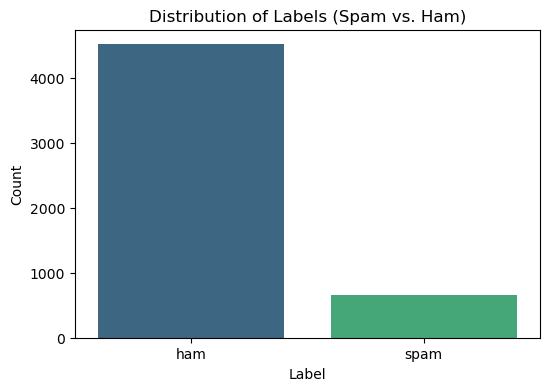

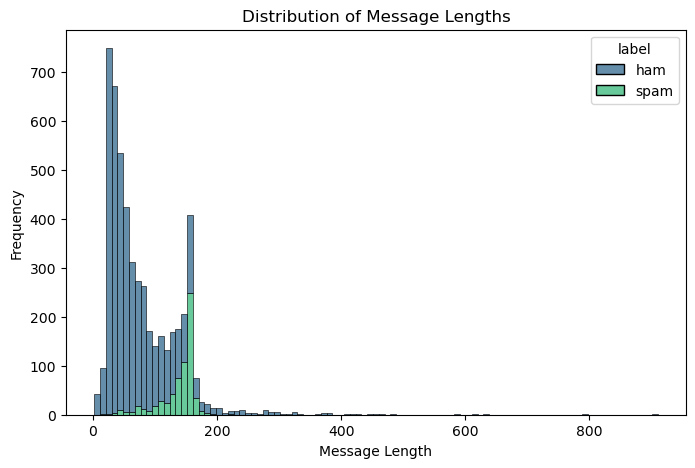

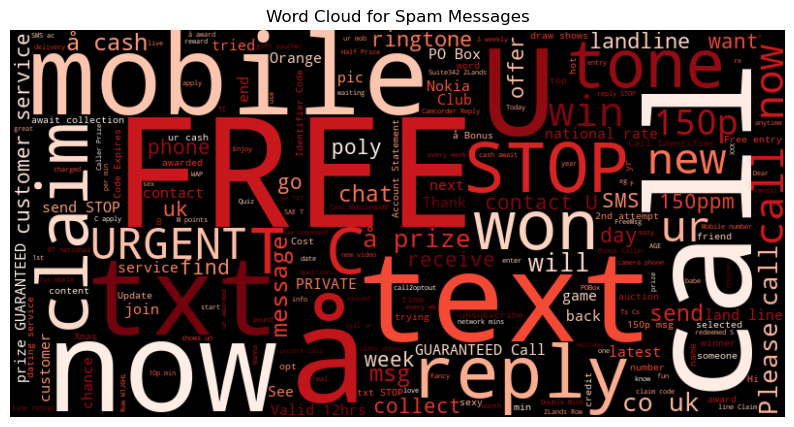

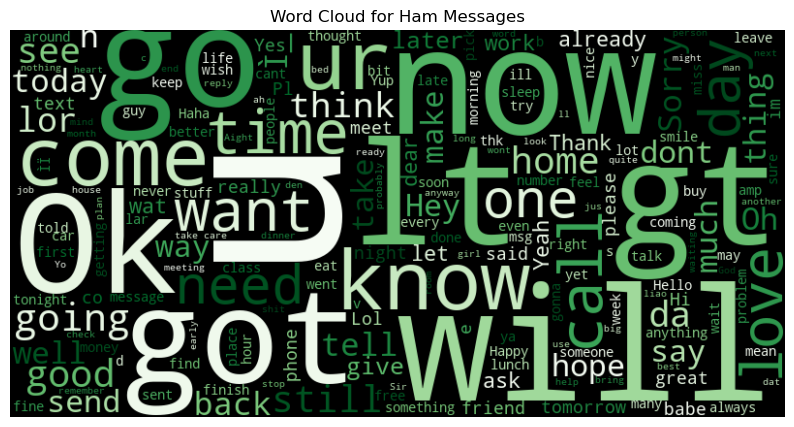

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Basic Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='viridis')
plt.title("Distribution of Labels (Spam vs. Ham)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Message Length Distribution
df['message_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df, x='message_length', hue='label', multiple='stack', palette='viridis')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

# WordCloud for Spam and Ham Messages
spam_text = " ".join(df[df['label'] == 'spam']['text'])
ham_text = " ".join(df[df['label'] == 'ham']['text'])

# WordCloud for Spam
plt.figure(figsize=(10, 6))
spam_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_text)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title("Word Cloud for Spam Messages")
plt.axis("off")
plt.show()

# WordCloud for Ham
plt.figure(figsize=(10, 6))
ham_wc = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(ham_text)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title("Word Cloud for Ham Messages")
plt.axis("off")
plt.show()


# Average Word Count for Spam vs. Ham Messages

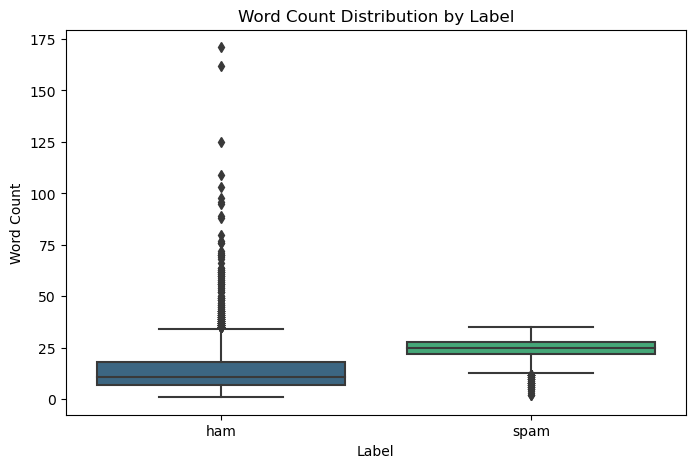

In [119]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='word_count', palette='viridis')
plt.title("Word Count Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.show()


# Character Count Distribution

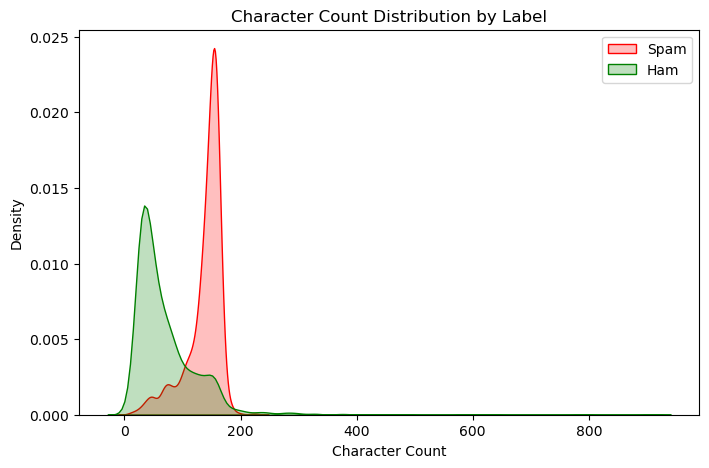

In [120]:
df['char_count'] = df['text'].apply(len)

plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['label'] == 'spam']['char_count'], label='Spam', color='red', fill=True)
sns.kdeplot(df[df['label'] == 'ham']['char_count'], label='Ham', color='green', fill=True)
plt.title("Character Count Distribution by Label")
plt.xlabel("Character Count")
plt.ylabel("Density")
plt.legend()
plt.show()


# Punctuation Frequency Analysis

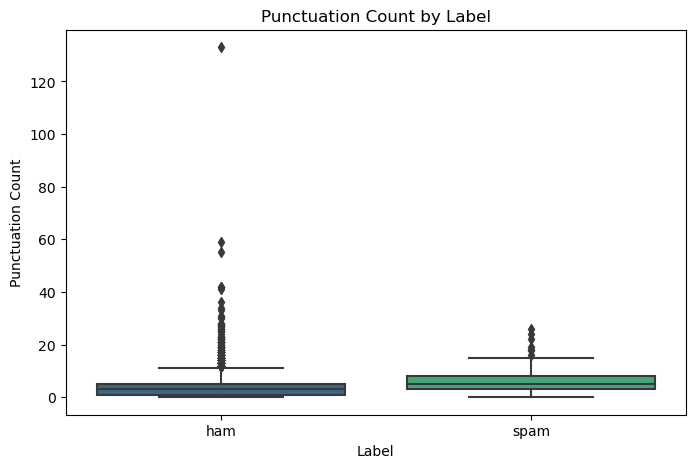

In [121]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it contains a 'text' column
df['punctuation_count'] = df['text'].apply(lambda x: sum([1 for char in x if char in string.punctuation]))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='punctuation_count', palette='viridis')
plt.title('Punctuation Count by Label')
plt.xlabel('Label')
plt.ylabel('Punctuation Count')
plt.show()

# Top N-grams (Bigrams/Trigrams) for Spam vs. Ham

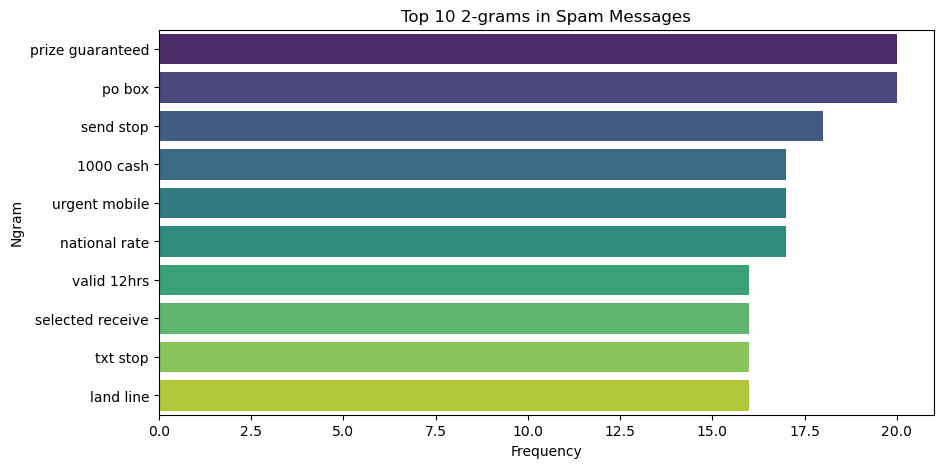

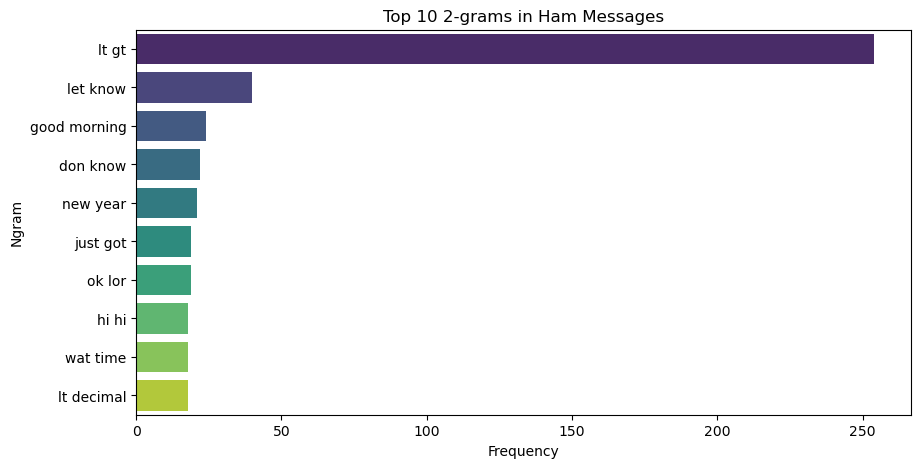

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(text, ngram_range=(2, 2), top_n=10, label='spam'):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    words_df = pd.DataFrame(words_freq, columns=['Ngram', 'Frequency'])
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=words_df, x='Frequency', y='Ngram', palette='viridis')
    plt.title(f"Top {top_n} {ngram_range[0]}-grams in {label.capitalize()} Messages")
    plt.show()

# Plot bigrams for spam and ham
plot_top_ngrams(df[df['label'] == 'spam']['text'], ngram_range=(2, 2), top_n=10, label='spam')
plot_top_ngrams(df[df['label'] == 'ham']['text'], ngram_range=(2, 2), top_n=10, label='ham')


# Sentiment Analysis

In [123]:
!pip install textblob

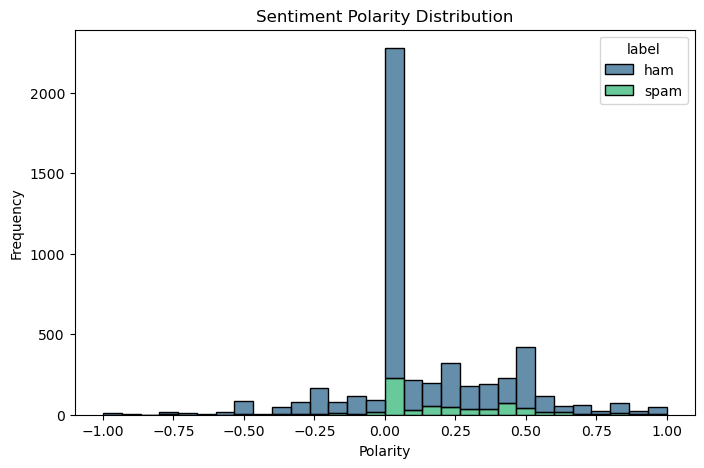

In [124]:
from textblob import TextBlob

df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 5))
sns.histplot(df, x='polarity', hue='label', multiple='stack', palette='viridis', bins=30)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


# Machine Learning Algorithms

# Using TF_IDF

In [40]:
# Libraries for data processing and visualizations
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/IS 707 Project Dataset/spam.csv', encoding='latin-1')  # Adjust encoding as needed

# Select relevant columns and rename them for simplicity
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Map 'spam' and 'ham' to binary values
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Split data into features and target
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# 1. Naive bayes

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

Accuracy: 0.9641255605381166


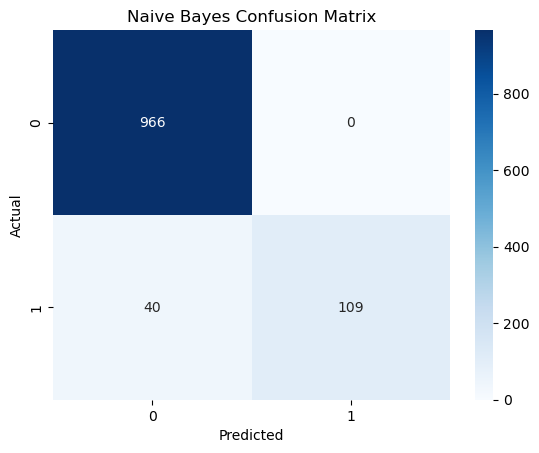

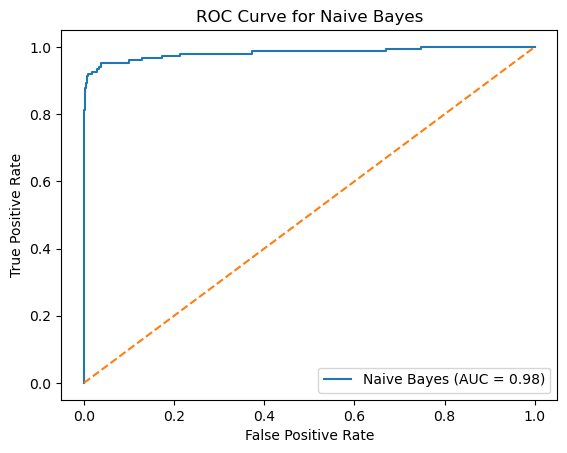

In [4]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_nb = nb_model.predict(X_test_tfidf)
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr, tpr, label="Naive Bayes (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_nb)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for Naive Bayes')
plt.show()


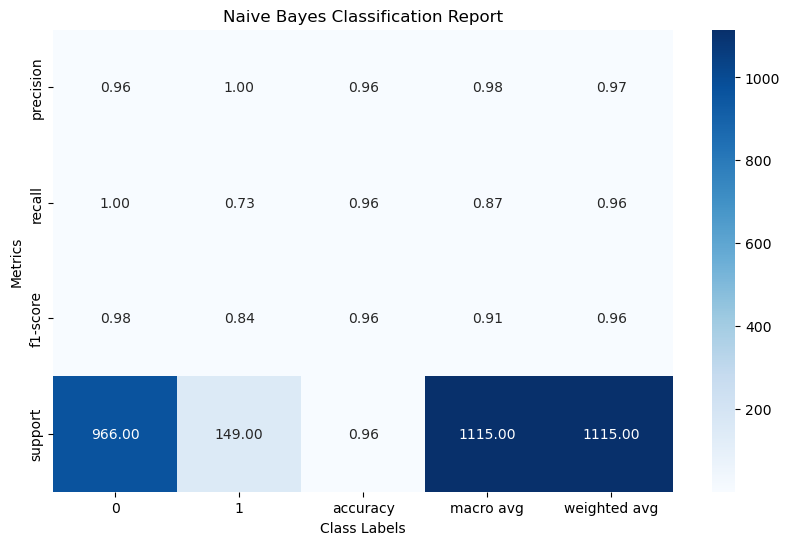

In [8]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_nb are already defined from your model
report = classification_report(y_test, y_pred_nb, output_dict=True)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).T

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('Naive Bayes Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()


# 2. Support vector machine

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9838565022421525


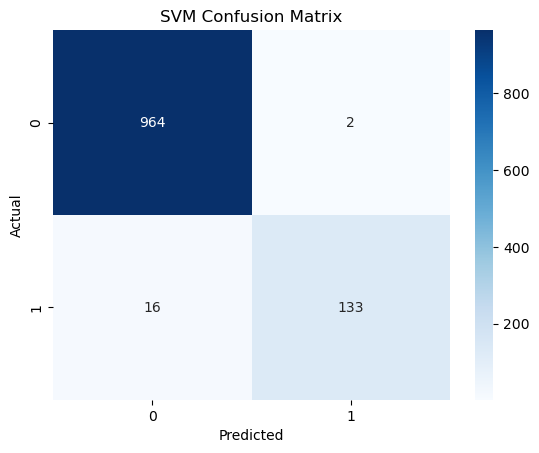

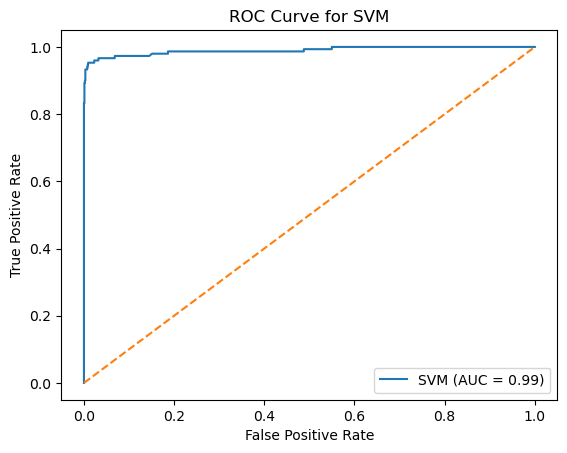

In [5]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test_tfidf)
y_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_svm)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for SVM')
plt.show()


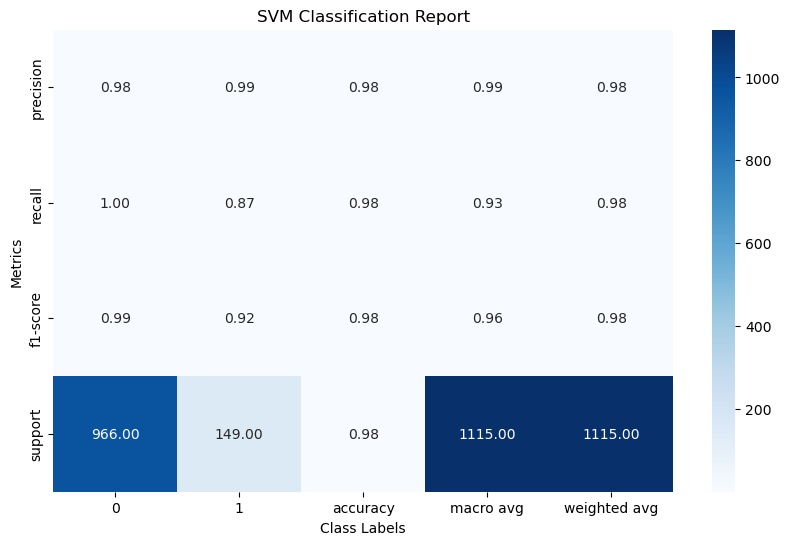

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the SVM model (assuming X_train_tfidf and y_train are defined)
svm_model = SVC(probability=True)  # Set probability=True for predict_proba() to work
svm_model.fit(X_train_tfidf, y_train)

# Predictions for the SVM model
y_pred_svm = svm_model.predict(X_test_tfidf)

# Generate the classification report
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert the classification report into a DataFrame
report_df_svm = pd.DataFrame(report_svm).T

# Plot the heatmap for SVM classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_svm[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('SVM Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()


# 3. Logistic regression

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9739910313901345


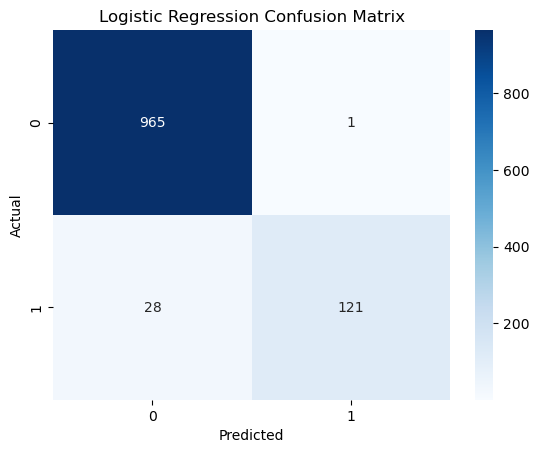

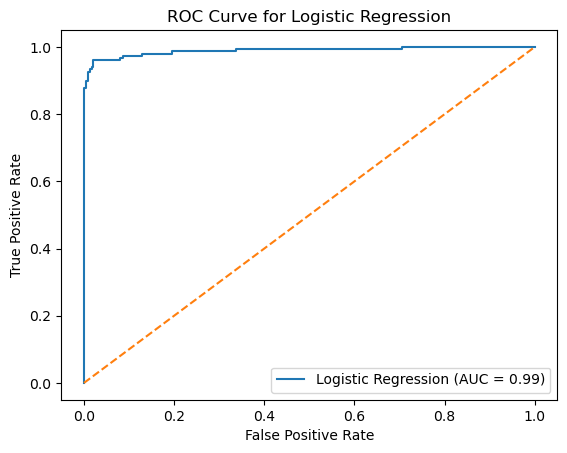

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_logreg = logreg_model.predict(X_test_tfidf)
y_prob_logreg = logreg_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_logreg)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for Logistic Regression')
plt.show()


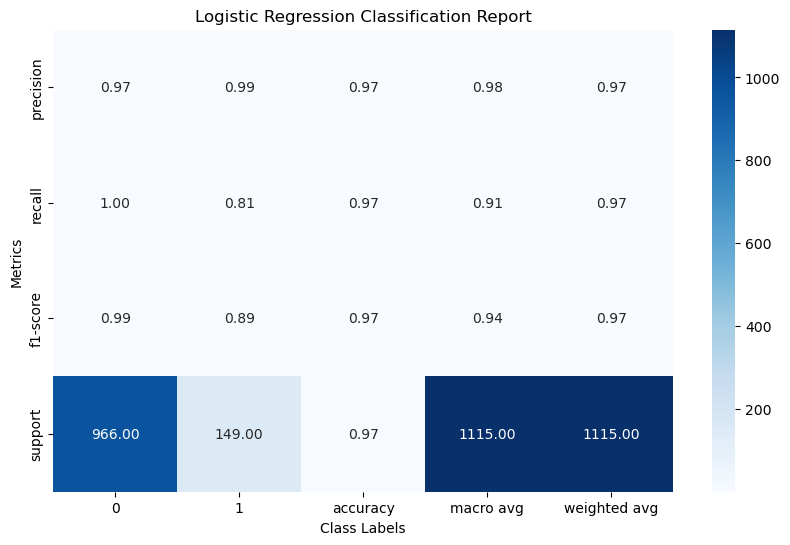

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the Logistic Regression model (assuming X_train_tfidf and y_train are defined)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_train)

# Predictions for the Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Generate the classification report
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)

# Convert the classification report into a DataFrame
report_df_log_reg = pd.DataFrame(report_log_reg).T

# Plot the heatmap for Logistic Regression classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_log_reg[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('Logistic Regression Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()

# 4. Decision tree

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       966
           1       0.88      0.83      0.86       149

    accuracy                           0.96      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115

Accuracy: 0.9623318385650225


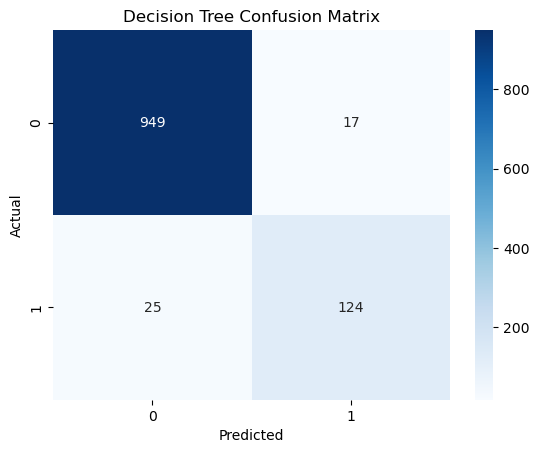

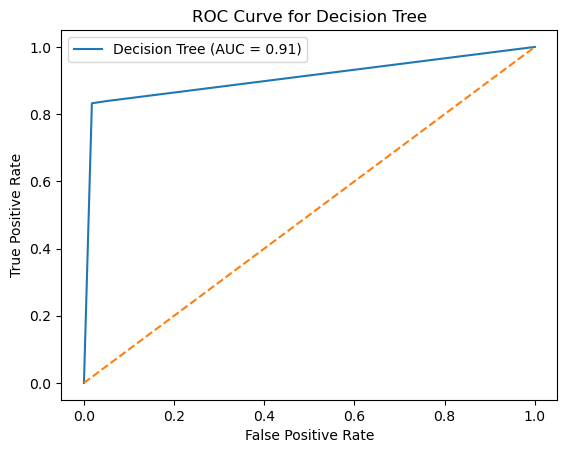

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test_tfidf)
y_prob_dt = dt_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_dt)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for Decision Tree')
plt.show()

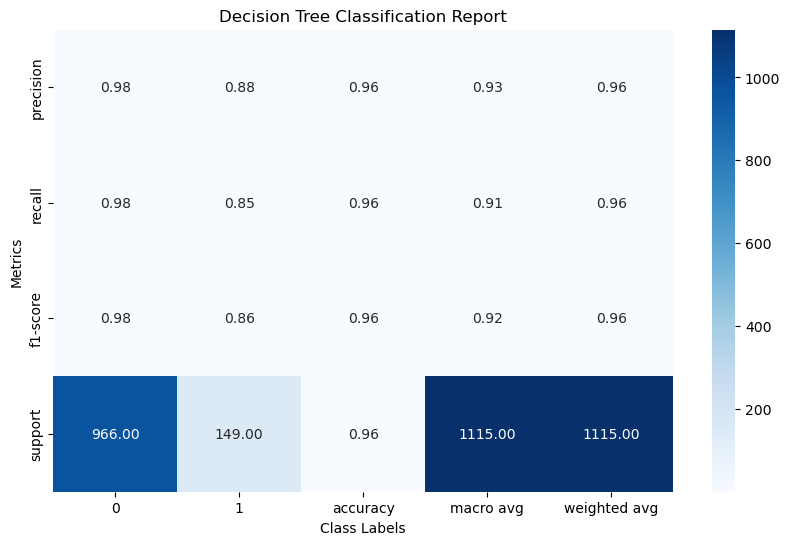

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the Decision Tree model (assuming X_train_tfidf and y_train are defined)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)

# Predictions for the Decision Tree model
y_pred_dt = dt_model.predict(X_test_tfidf)

# Generate the classification report
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Convert the classification report into a DataFrame
report_df_dt = pd.DataFrame(report_dt).T

# Plot the heatmap for Decision Tree classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_dt[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('Decision Tree Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()


# 5. Random forest

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9730941704035875


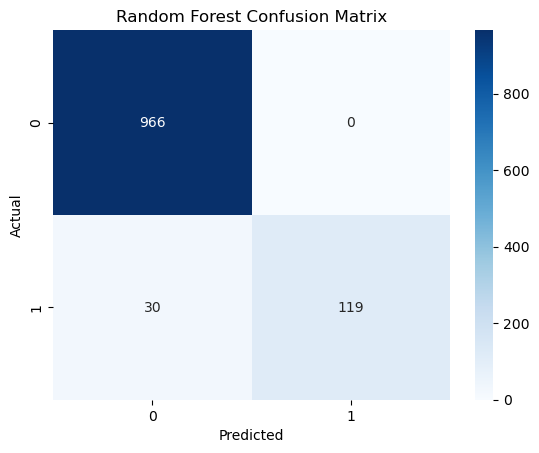

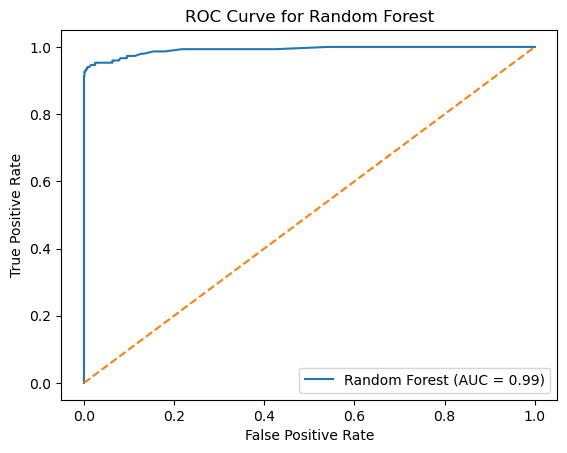

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_tfidf)
y_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for Random Forest')
plt.show()

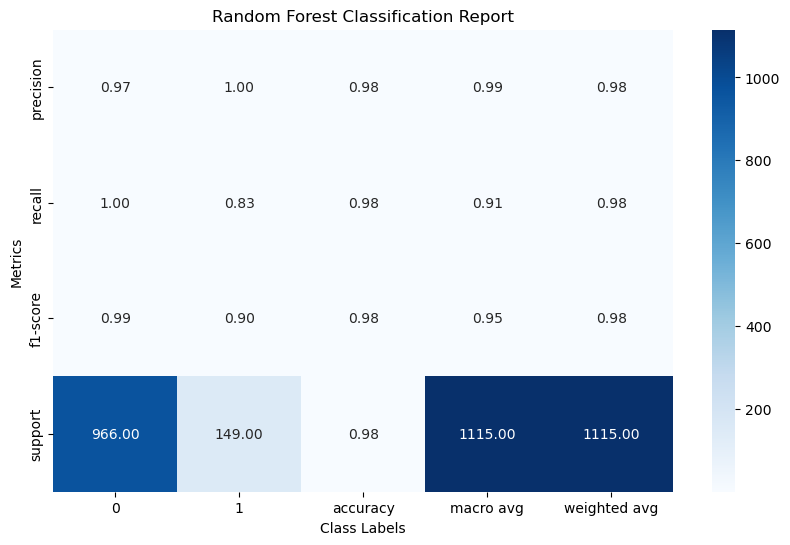

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the Random Forest model (assuming X_train_tfidf and y_train are defined)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Predictions for the Random Forest model
y_pred_rf = rf_model.predict(X_test_tfidf)

# Generate the classification report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert the classification report into a DataFrame
report_df_rf = pd.DataFrame(report_rf).T

# Plot the heatmap for Random Forest classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_rf[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('Random Forest Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()


# 6.KNN 

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.41      0.58       149

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.77      1115
weighted avg       0.93      0.92      0.91      1115

Accuracy: 0.9210762331838565


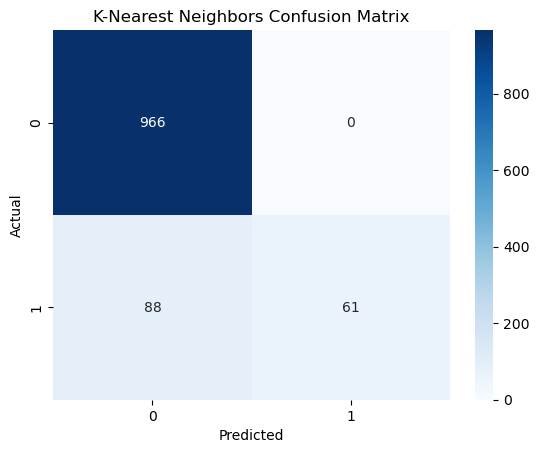

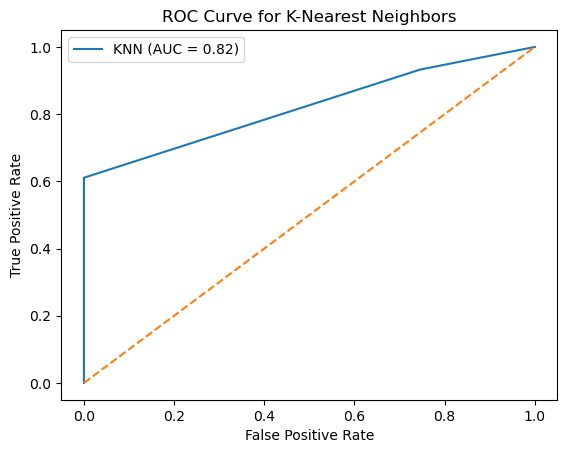

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_knn = knn_model.predict(X_test_tfidf)
y_prob_knn = knn_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label="KNN (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_knn)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for K-Nearest Neighbors')
plt.show()


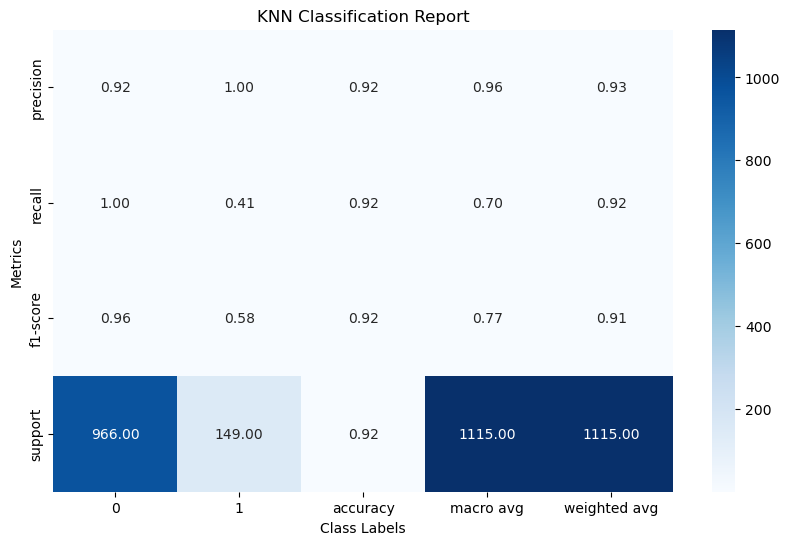

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the KNN model (assuming X_train_tfidf and y_train are defined)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

# Predictions for the KNN model
y_pred_knn = knn_model.predict(X_test_tfidf)

# Generate the classification report
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert the classification report into a DataFrame
report_df_knn = pd.DataFrame(report_knn).T

# Plot the heatmap for KNN classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_knn[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('KNN Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()


# 7. Multi-Layer Perceptron (MLP) Classifier

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.94       149

    accuracy                           0.99      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy: 0.9856502242152466


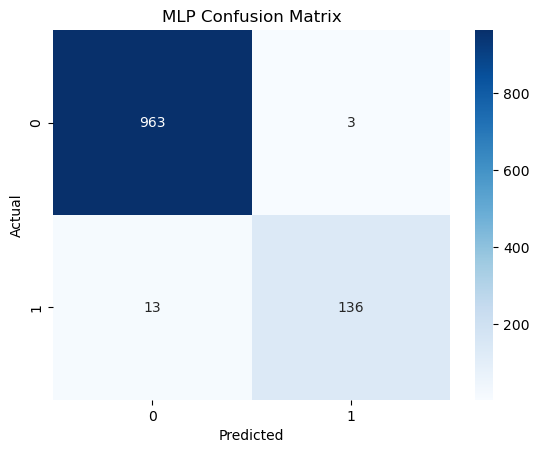

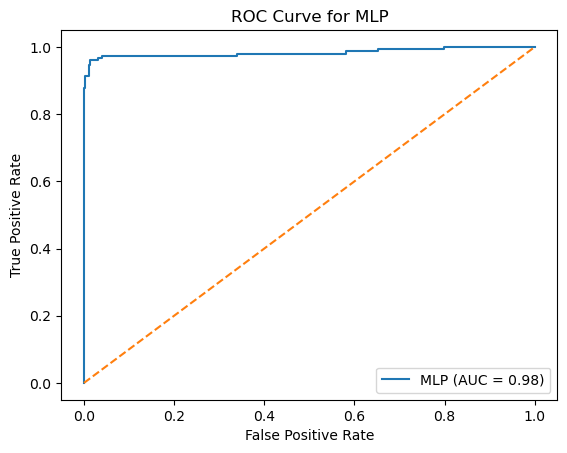

In [3]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_mlp = mlp_model.predict(X_test_tfidf)
y_prob_mlp = mlp_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
plt.plot(fpr, tpr, label="MLP (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_mlp)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for MLP')
plt.show()


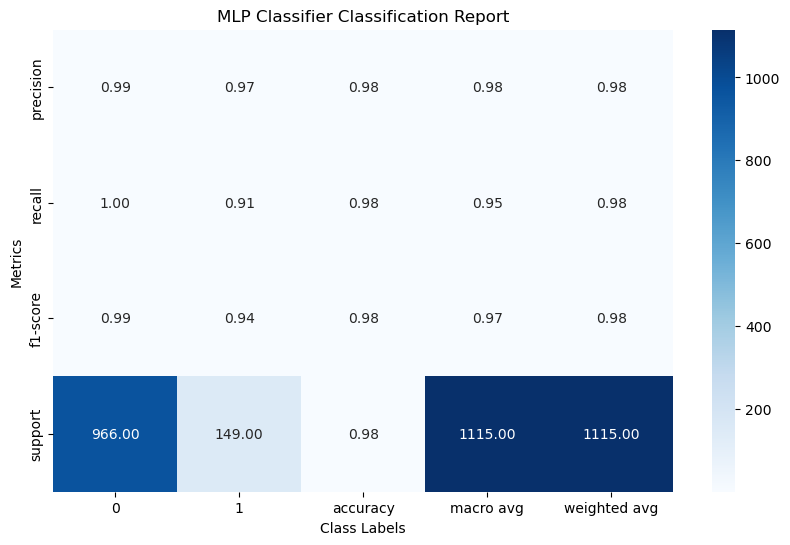

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the MLP Classifier model (assuming X_train_tfidf and y_train are defined)
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train_tfidf, y_train)

# Predictions for the MLP model
y_pred_mlp = mlp_model.predict(X_test_tfidf)

# Generate the classification report
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)

# Convert the classification report into a DataFrame
report_df_mlp = pd.DataFrame(report_mlp).T

# Plot the heatmap for MLP classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_mlp[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('MLP Classifier Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()


# 8. Gradient boosting

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9704035874439462


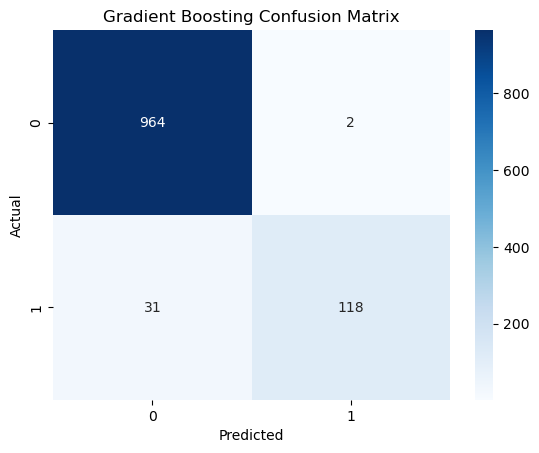

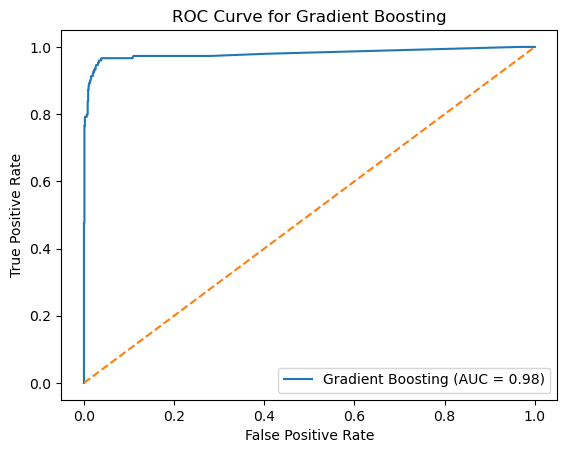

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_gb = gb_model.predict(X_test_tfidf)
y_prob_gb = gb_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluation metrics
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_gb)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC Curve for Gradient Boosting')
plt.show()


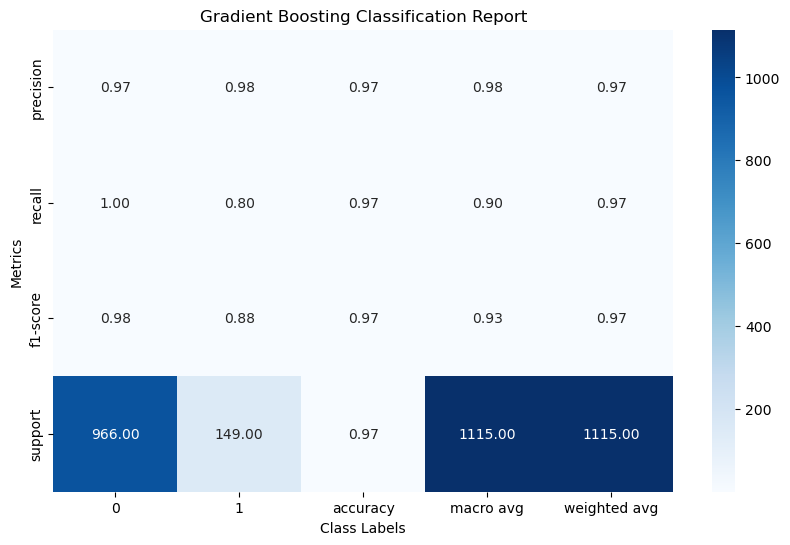

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train the Gradient Boosting model (assuming X_train_tfidf and y_train are defined)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)

# Predictions for the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_tfidf)

# Generate the classification report
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)

# Convert the classification report into a DataFrame
report_df_gb = pd.DataFrame(report_gb).T

# Plot the heatmap for Gradient Boosting classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_gb[['precision', 'recall', 'f1-score', 'support']].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Labeling
plt.title('Gradient Boosting Classification Report')
plt.xlabel('Class Labels')
plt.ylabel('Metrics')

# Show the plot
plt.show()

# Using Doc2vec

In [20]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


# 1. Naive bayes

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

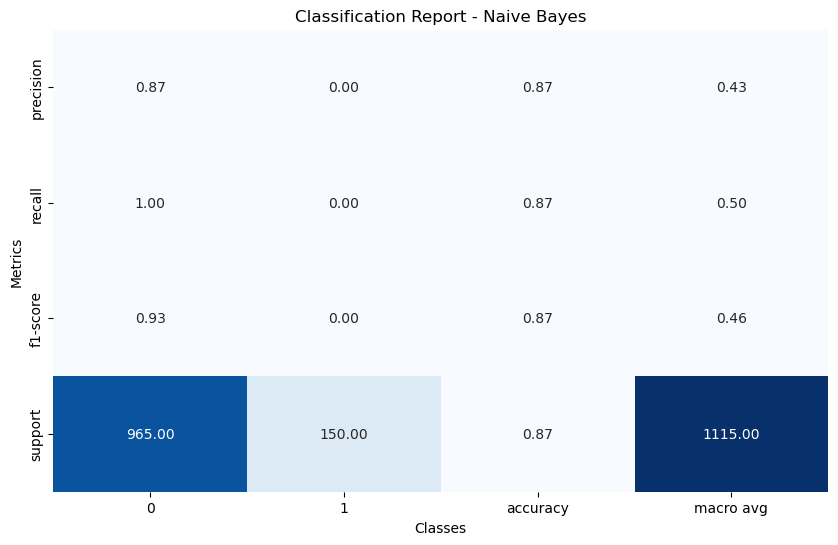

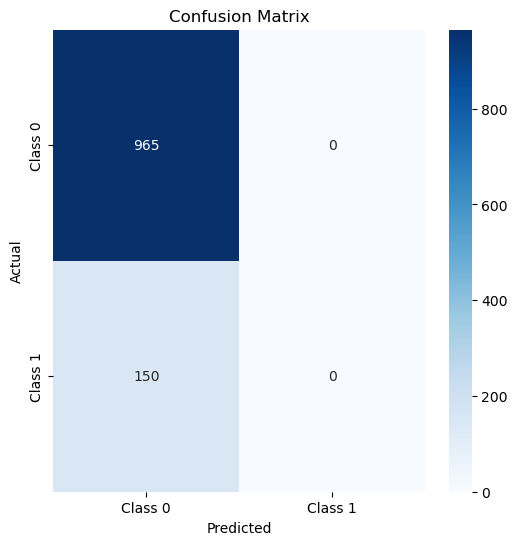

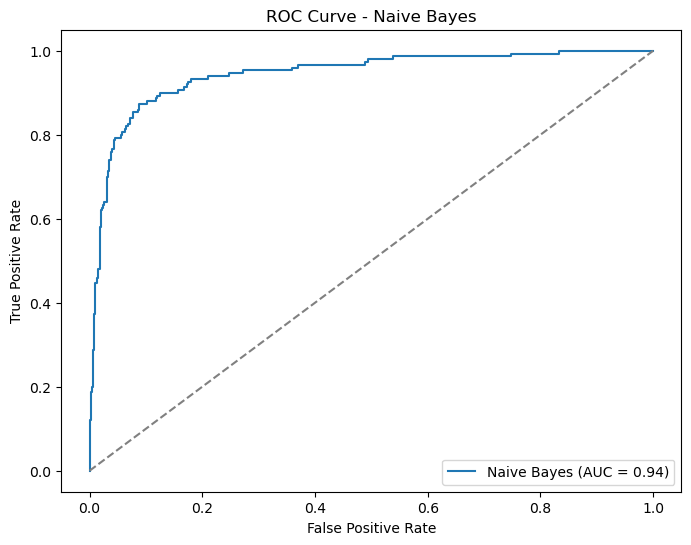

In [41]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Ensure non-negative values by shifting all vectors by the absolute value of the minimum value
X = X - X.min().min()

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title("Classification Report - Naive Bayes")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Naive Bayes (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="lower right")
plt.show()


# 2. Support vector machine

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.94      0.81      0.87       150

    accuracy                           0.97      1115
   macro avg       0.96      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



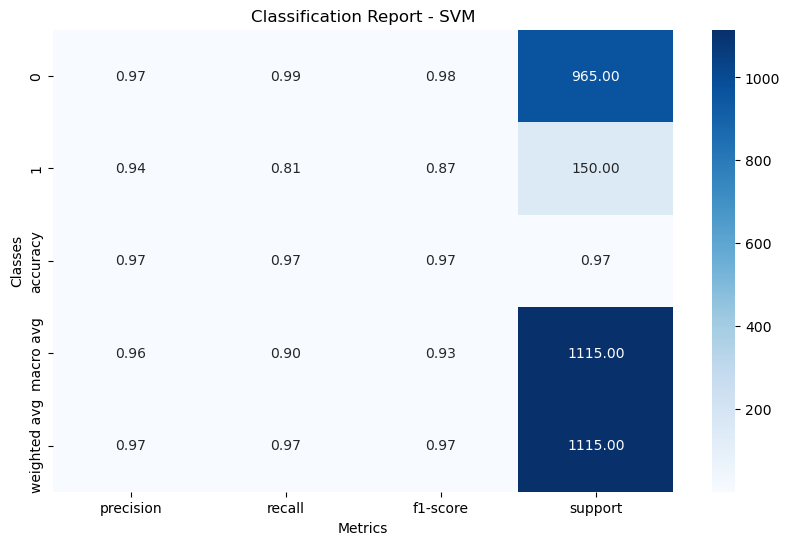

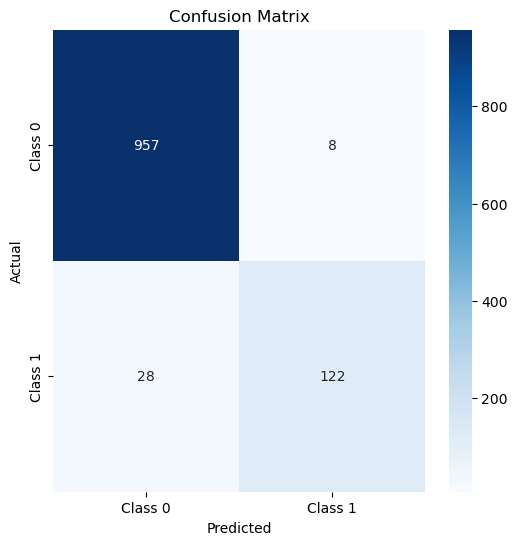

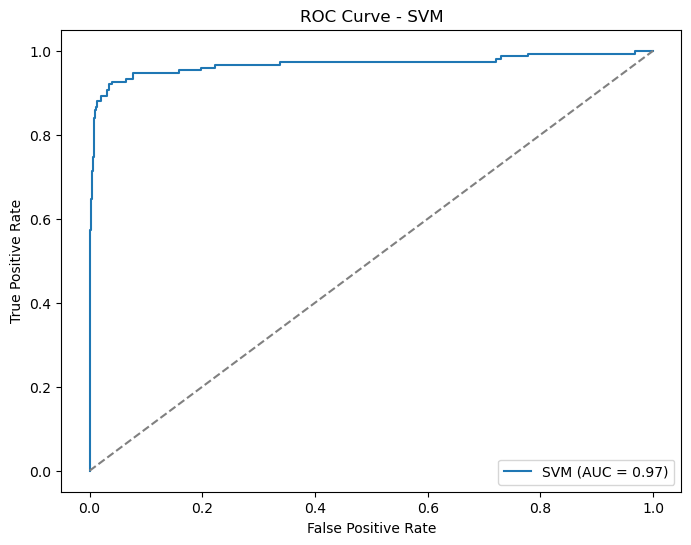

In [42]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine classifier
clf = SVC(probability=True)  # Enable probability estimates
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - SVM")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.show()


# 3. Logistic regression

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       965
           1       0.84      0.73      0.78       150

    accuracy                           0.95      1115
   macro avg       0.90      0.85      0.88      1115
weighted avg       0.94      0.95      0.94      1115



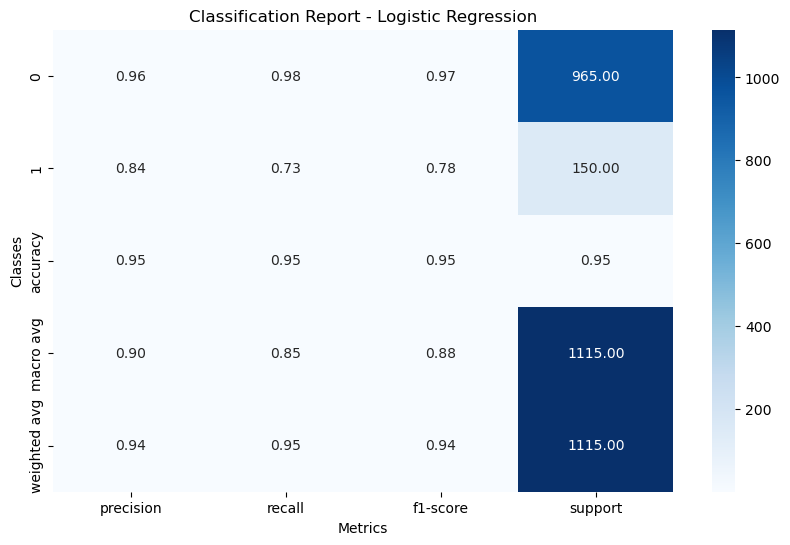

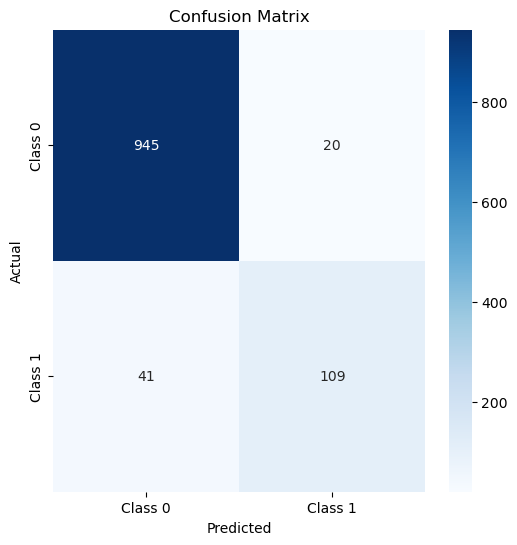

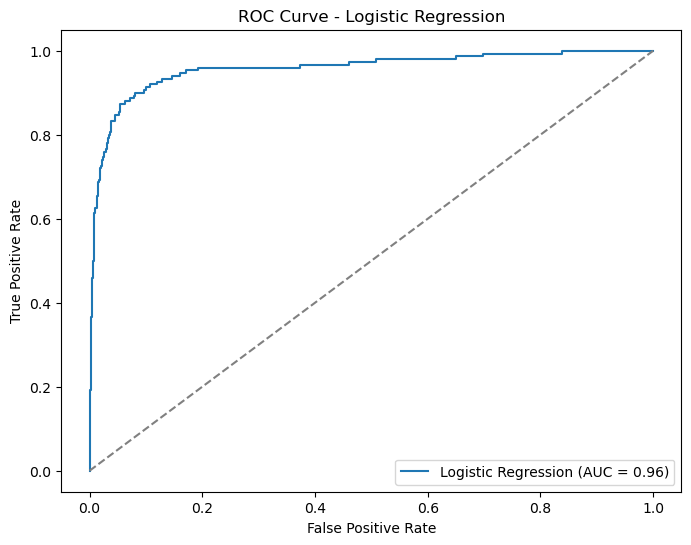

In [43]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - Logistic Regression")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


# 4. Decision tree

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       965
           1       0.62      0.67      0.64       150

    accuracy                           0.90      1115
   macro avg       0.78      0.80      0.79      1115
weighted avg       0.90      0.90      0.90      1115



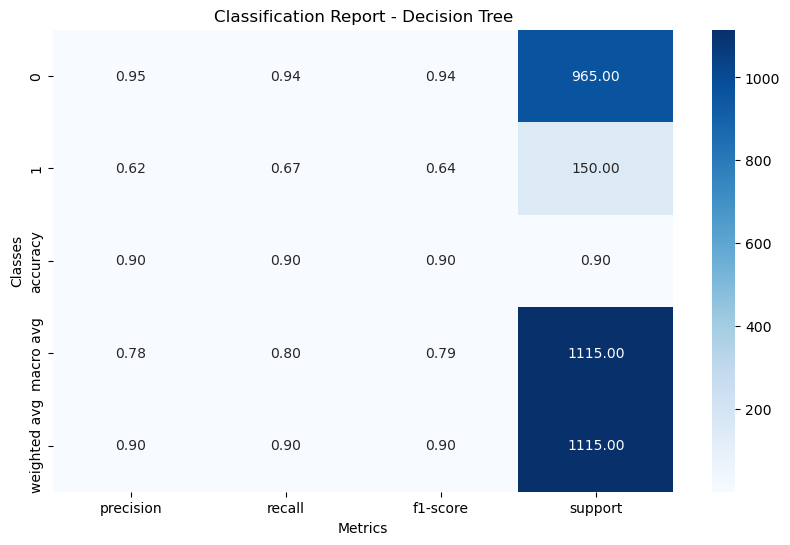

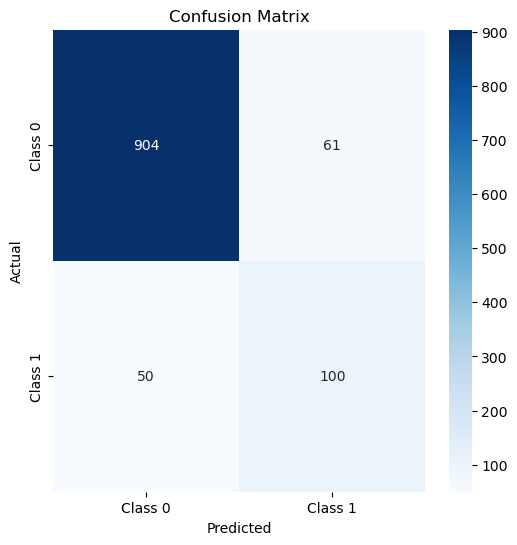

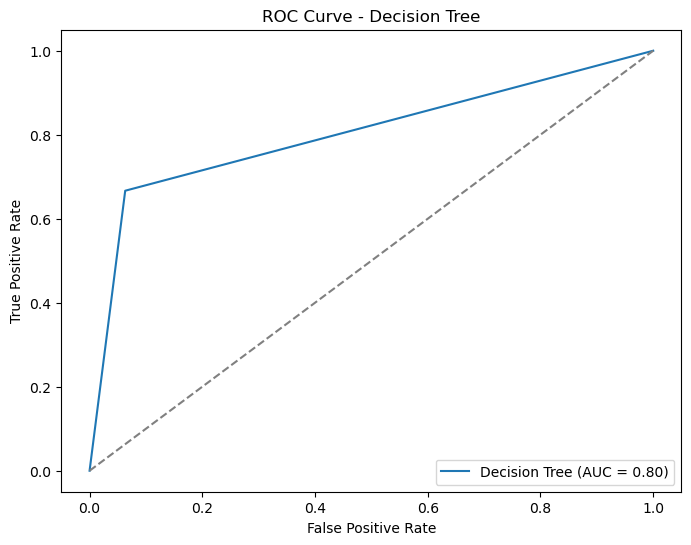

In [44]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - Decision Tree")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()


# 5. Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.98      0.68      0.80       150

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



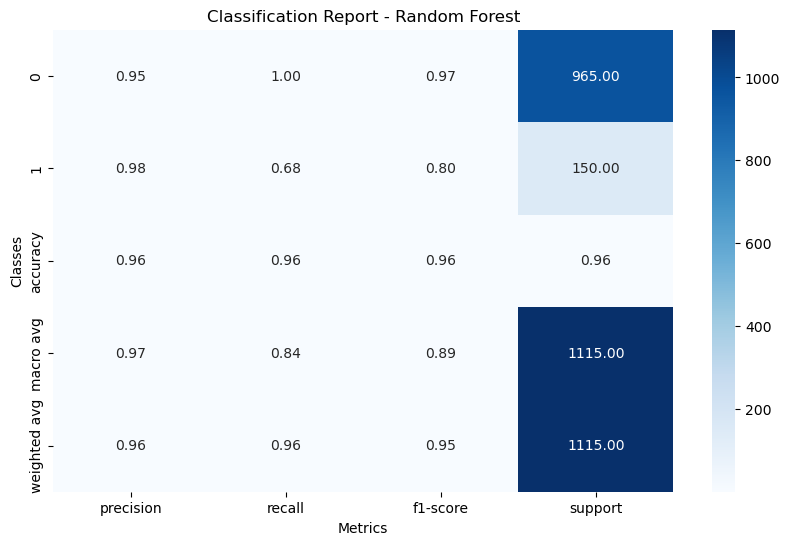

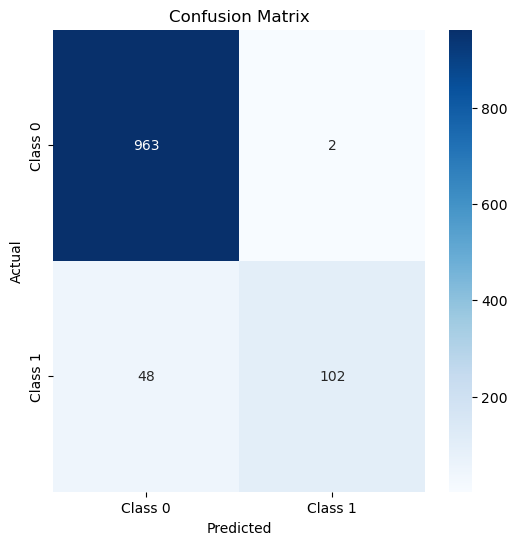

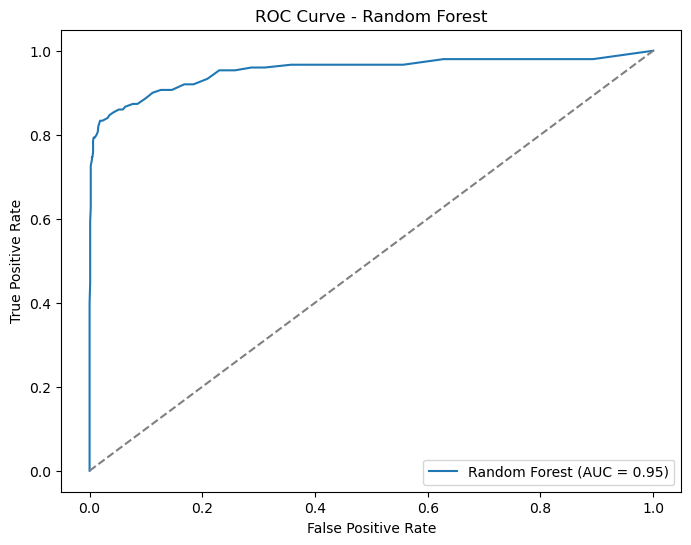

In [26]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - Random Forest")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


# 6. KNN

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       965
           1       0.82      0.82      0.82       150

    accuracy                           0.95      1115
   macro avg       0.90      0.90      0.90      1115
weighted avg       0.95      0.95      0.95      1115



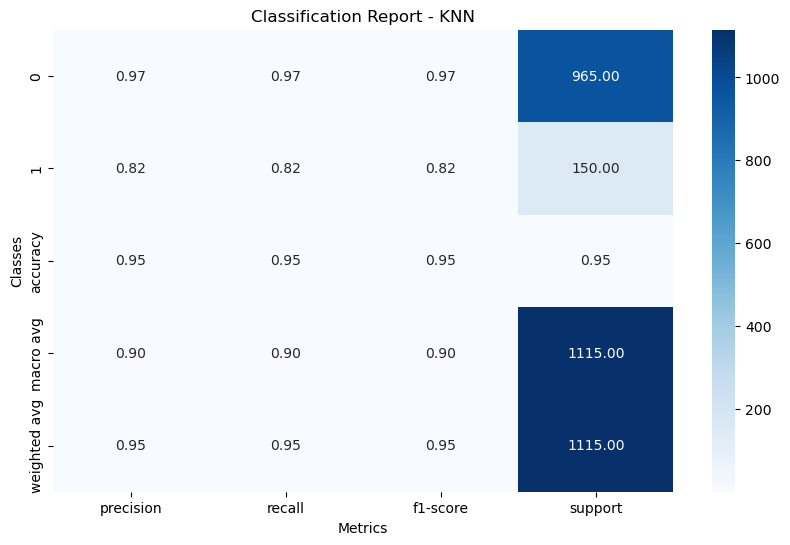

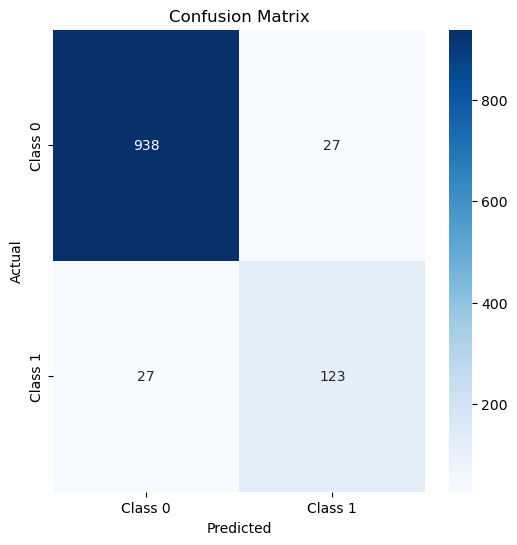

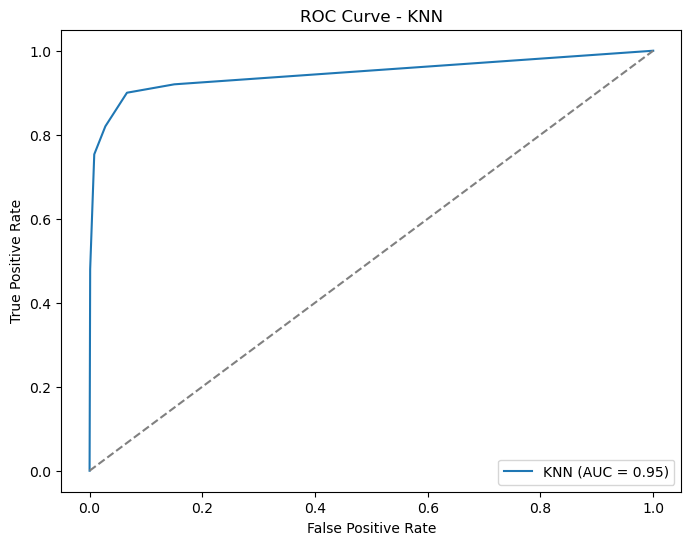

In [45]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors for optimal performance
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - KNN")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="KNN (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()


# 7. Multi-Layer Perceptron (MLP) Classifier

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.94      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



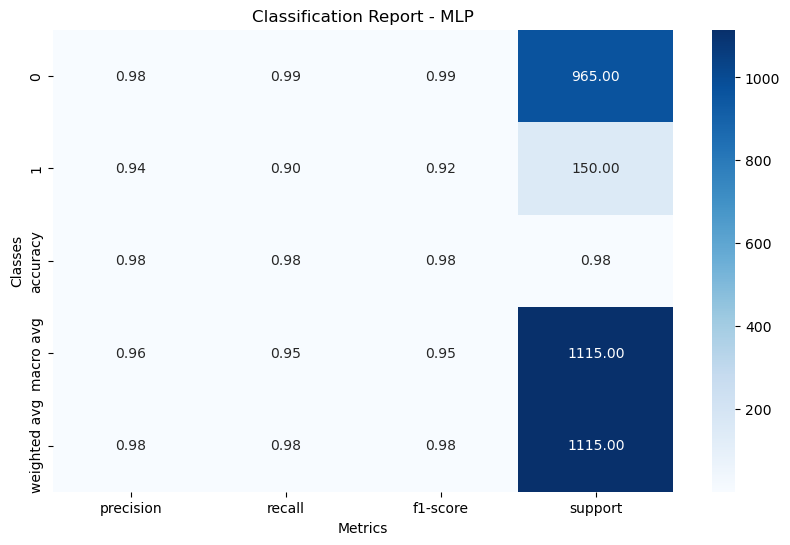

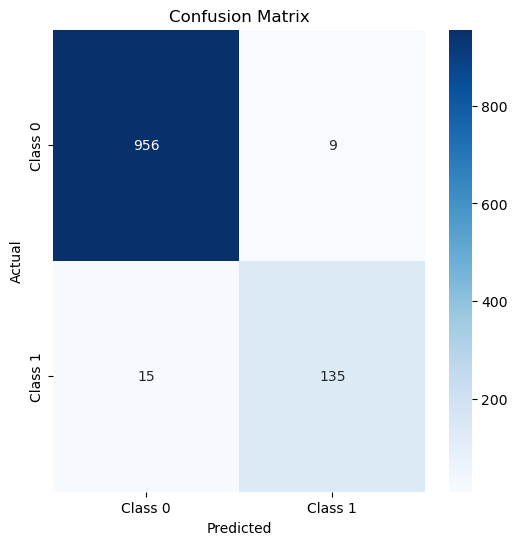

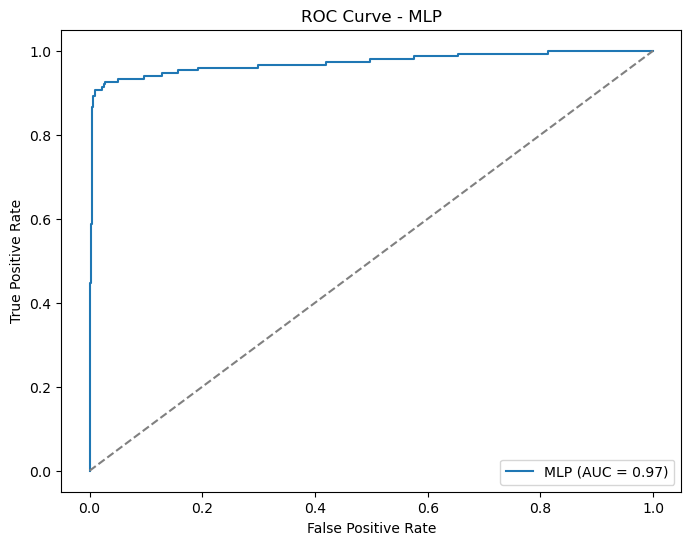

In [46]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multi-Layer Perceptron (MLP) classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - MLP")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="MLP (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend(loc="lower right")
plt.show()


# 8. Gradient boosting

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       965
           1       0.92      0.75      0.82       150

    accuracy                           0.96      1115
   macro avg       0.94      0.87      0.90      1115
weighted avg       0.96      0.96      0.96      1115



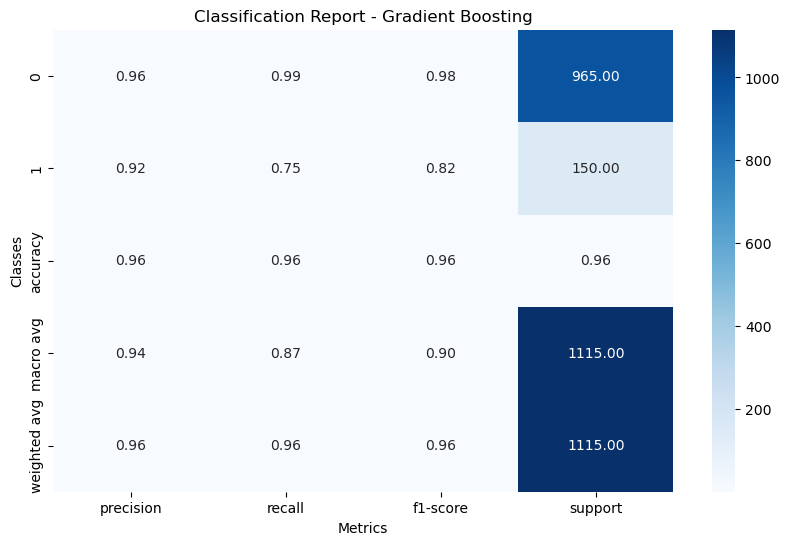

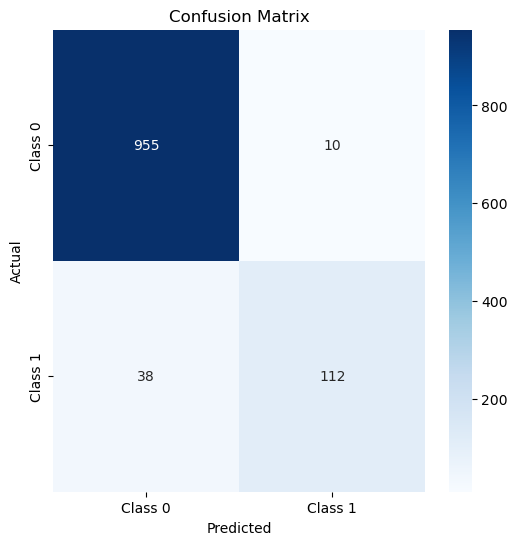

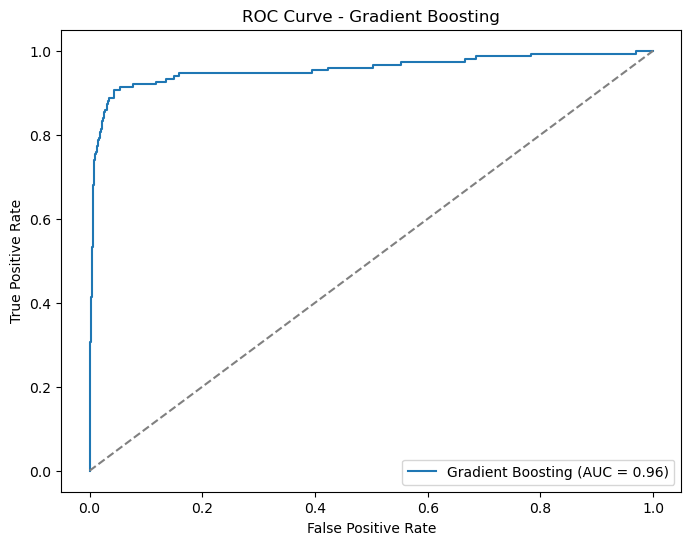

In [47]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Assuming df contains a 'text' column with raw text
# Tokenizing the text (split into words)
df['text_tokenized'] = df['text'].apply(lambda x: x.split())  # Simple tokenization

# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=row['text_tokenized'], tags=[str(i)]) for i, row in df.iterrows()]

# Create and train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Function to convert text into a vector
def get_doc_vector(text):
    return model.infer_vector(text)

# Apply Doc2Vec to transform your dataset
X = df['text_tokenized'].apply(get_doc_vector)  # Tokenized text passed to Doc2Vec
X = pd.DataFrame(X.tolist())  # Convert list of vectors into a DataFrame for model use

# Assume 'label' is your target variable
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# 1. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Graphical Representation of the Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report (Precision, Recall, F1-score, Support)
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report - Gradient Boosting")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.show()


# Results

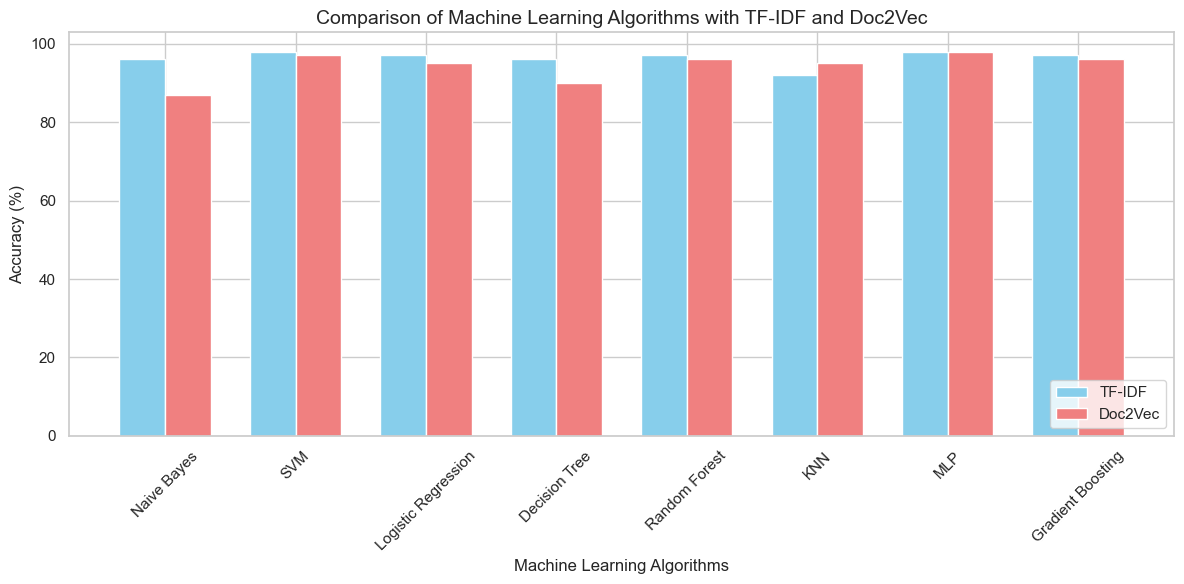

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Machine Learning Algorithms': ['Naive Bayes', 'SVM', 'Logistic Regression', 'Decision Tree', 
                                    'Random Forest', 'KNN', 'MLP', 'Gradient Boosting'],
    'Accuracy with TF-IDF': [96, 98, 97, 96, 97, 92, 98, 97],
    'Accuracy with Doc2Vec': [87, 97, 95, 90, 96, 95, 98, 96]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
x = range(len(df['Machine Learning Algorithms']))

# Create the bar chart
plt.bar(x, df['Accuracy with TF-IDF'], width=bar_width, label='TF-IDF', color='skyblue')
plt.bar([i + bar_width for i in x], df['Accuracy with Doc2Vec'], width=bar_width, label='Doc2Vec', color='lightcoral')

# Add labels and titles
plt.xlabel('Machine Learning Algorithms', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Comparison of Machine Learning Algorithms with TF-IDF and Doc2Vec', fontsize=14)
plt.xticks([i + bar_width/2 for i in x], df['Machine Learning Algorithms'], rotation=45)

# Add a legend
plt.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()
